## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
MouseStudy_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
MouseStudy_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
Mice_num = MouseStudy_df["Mouse ID"].value_counts()
Mice_num

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Duplicate_ID = MouseStudy_df.loc[MouseStudy_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
#Duplicate_ID
Mice_Group = MouseStudy_df.reset_index().groupby(["Mouse ID","Timepoint"])[["index"]].count()

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
#Duolicate_df = MouseStudy_df.loc[MouseStudy_df["Mouse ID"] == "g989", :]
#Duolicate_df
duplicated_data = Mice_Group.loc[Mice_Group["index"]>1]
duplicated_data

index
Mouse ID Timepoint       
g989     0              2
         5              2
         10             2
         15             2
         20             2

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_mice_df = MouseStudy_df[MouseStudy_df['Mouse ID'] != "g989"]
Clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
Clean_mice = Clean_mice_df["Mouse ID"].value_counts()
Clean_mice

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# I have used the cleaned dataframe to do the calculations of the Drug Regimen
Summary_group = Clean_mice_df.groupby("Drug Regimen")
Summary_group

In [12]:

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Mean_summary = Summary_group["Tumor Volume (mm3)"].mean()
Median_Summary = Summary_group["Tumor Volume (mm3)"].median()
Variance_summary = Summary_group["Tumor Volume (mm3)"].var()
Sem_summary = Summary_group["Tumor Volume (mm3)"].sem()
STD_summary = Summary_group["Tumor Volume (mm3)"].std()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stat = pd.DataFrame({"Mean Tumor Volume":Mean_summary, 
                            "Median Tumor Volume":Median_Summary, 
                           "Tumor Volume Variance":Variance_summary, 
                           "Tumor Volume Std. Dev.":STD_summary, 
                           "Tumor Volume Std. Err.":Sem_summary})

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  Clean_mice_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Mice')

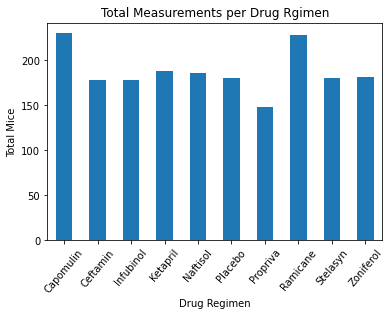

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugs = pd.DataFrame(Clean_mice_df.groupby(["Drug Regimen"]).count()).reset_index()
Drugs_df = drugs[["Drug Regimen" , "Mouse ID"]]
Drugs_df = Drugs_df.set_index("Drug Regimen")


barChart = Drugs_df.plot(kind = "bar" , legend=False , rot=50, title = "Total Measurements per Drug Rgimen")
barChart.set_xlabel("Drug Regimen")
barChart.set_ylabel("Total Mice")



In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create the array of the number of mice that each drug have 
Num_mice = (Clean_mice_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
Num_mice
Drugs_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


Text(23.875, 0.5, 'Total Mice')

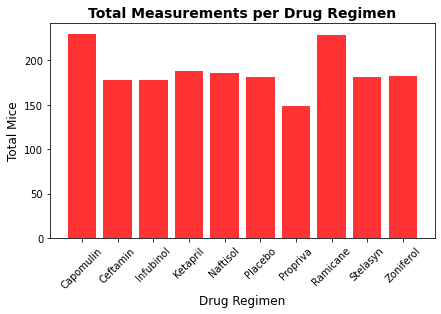

In [16]:
x_axis = np.arange(len(Drugs_df))
x_axis
plt.bar(x_axis, Num_mice, color='r', alpha = 0.8, align = "center")

#Tick locations will assign the name for x_axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title("Total Measurements per Drug Regimen",fontsize=14, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Total Mice",fontsize=12)


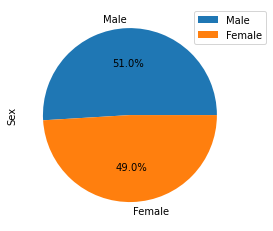

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender = Clean_mice_df["Sex"].value_counts()
piechart = Gender.plot(kind= "pie", autopct="%1.1f%%")
piechart.legend(loc='upper right', frameon =True, bbox_to_anchor=(1.15, 1))

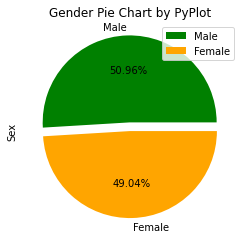

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = 0.1, 0
colors = ["green", "orange"]
labels = ["Male", "Female"]
plt.pie(Gender, explode=explode, colors=colors, labels=labels, autopct="%1.2f%%")
plt.title("Gender Pie Chart by PyPlot")
plt.ylabel("Sex")
plt.legend(labels, loc="upper right", frameon=True, bbox_to_anchor=(1,1))
plt.savefig('pyplot_piechart')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=Clean_mice_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Quartile_DF = pd.merge(max_timepoint, Clean_mice_df, on=(["Mouse ID" , "Timepoint"]))
Quartile_DF

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data = []

In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes for treatment in treatments: 
for Treatment in Treatments_list:
    Tumor_regimen = Quartile_DF.loc[Quartile_DF["Drug Regimen"] == Treatment]
    Tumor_vol= Tumor_regimen['Tumor Volume (mm3)']
    
#append tumor data to new list 
    Tumor_vol_data.append(Tumor_vol)

In [22]:
 # add subset 
quartile0 = Tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = Tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = Tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = Tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3

In [23]:
# Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {Treatments_list[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {Treatments_list[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {Treatments_list[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {Treatments_list[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")


For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


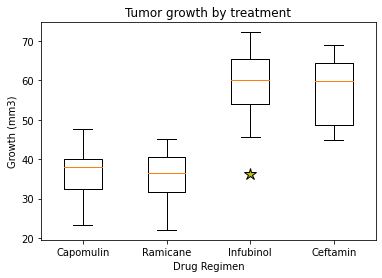

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='*', markerfacecolor='y', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(Tumor_vol_data, flierprops = flierprops, labels = Treatments_list)
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mice = Clean_mice_df.loc[Clean_mice_df["Drug Regimen"] == "Capomulin"]
Capomulin_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [26]:
forline_df = Capomulin_mice.loc[Capomulin_mice["Mouse ID"] == "s185",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


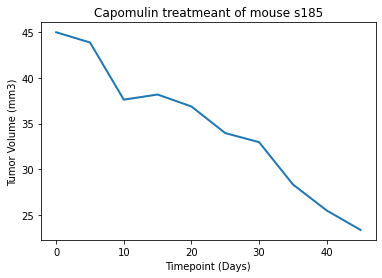

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

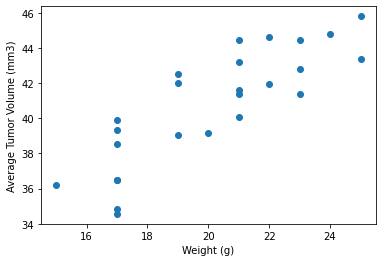

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Cap_avg = Capomulin_mice.groupby(['Mouse ID']).mean()
plt.scatter(Cap_avg['Weight (g)'],Cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Correlation = round(st.pearsonr(Cap_avg["Weight (g)"], Cap_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {Correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [31]:
Line_Regression = st.linregress(Cap_avg['Weight (g)'],Cap_avg['Tumor Volume (mm3)'])
Line_Regression

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [32]:
#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

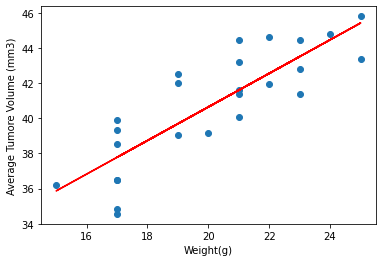

In [35]:
y_values = Cap_avg['Weight (g)']*mslope+bintercept
plt.scatter(Cap_avg['Weight (g)'],Cap_avg['Tumor Volume (mm3)'])
plt.plot(Cap_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.savefig('Correlation&Regression')
plt.show()